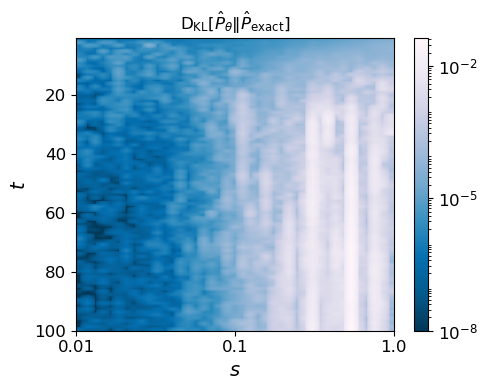

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.colors as colors

L = 4
logs = np.linspace(-2, 0, 41)
s = 10 ** logs
t = np.linspace(1, 100, 100)

# load KL values
KL_reverse = np.zeros((41, 100))
for i, logs in enumerate(np.linspace(-2, 0, 41)):
    path = os.path.join('./out/compare_KL', 'logs{:.2f}/log.txt'.format(logs))
    data = np.loadtxt(path)
    KL_reverse[i, :] = data[:, 1]
KL_reverse = np.where(KL_reverse < 1e-8, 1e-8, KL_reverse)

fig, ax = plt.subplots(figsize=(5, 4))
pcm = ax.imshow(KL_reverse.T, 
               aspect='auto',
               norm=colors.LogNorm(vmin=KL_reverse.min(), vmax=KL_reverse.max()),
               cmap='PuBu_r',
               extent=[0, 100, t.max(), t.min(),], 
               interpolation='bilinear',
               )

ax.set_xticks([0, 50, 100], [1e-2, 1e-1, 1e-0])
cb = plt.colorbar(pcm, ax=ax)
cb.ax.tick_params(labelsize=12)
cb.ax.set_yticks([1e-8, 1e-5, 1e-2])
ax.set_title(r'$\mathrm{D}_{\mathrm{KL}}[\hat{P}_{\theta}\Vert \hat{P}_{\mathrm{exact}}]$')
ax.tick_params('both', labelsize=12)
ax.set_xlabel(r'$s$', fontsize=14)
ax.set_ylabel(r'$t$', fontsize=14)

plt.tight_layout()
plt.savefig('KL_exact.svg')

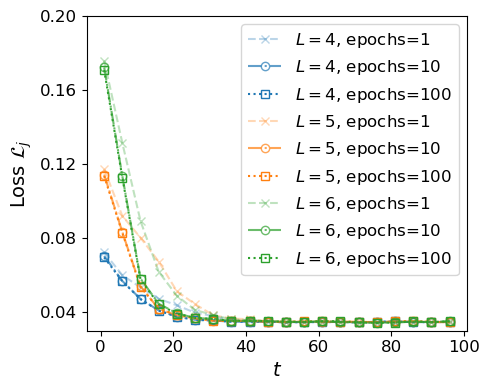

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.colors as colors

logs = -0.6
data_l4e1 = np.loadtxt(f'./out/finite_time_less_epochs/SE/L4_D2W32K5_E1BS1k/logs{logs:.2f}/log.txt')[:, 1]
data_l4e10 = np.loadtxt(f'./out/finite_time_less_epochs/SE/L4_D2W32K5_E10BS1k/logs{logs:.2f}/log.txt')[:, 1]
data_l4e100 = np.loadtxt(f'./out/finite_time/SE/L4_D2W32K5_E100BS1k/logs{logs:.2f}/log.txt')[21::20, 1]

data_l5e1 = np.loadtxt(f'./out/finite_time_less_epochs/SE/L5_D2W32K5_E1BS1k/logs{logs:.2f}/log.txt')[:, 1]
data_l5e10 = np.loadtxt(f'./out/finite_time_less_epochs/SE/L5_D2W32K5_E10BS1k/logs{logs:.2f}/log.txt')[:, 1]
data_l5e100 = np.loadtxt(f'./out/finite_time/SE/L5_D2W32K5_E100BS1k/logs{logs:.2f}/log.txt')[21::20, 1]

data_l6e1 = np.loadtxt(f'./out/finite_time_less_epochs/SE/L6_D3W32K5_E1BS1k/logs{logs:.2f}/log.txt')[:, 1]
data_l6e10 = np.loadtxt(f'./out/finite_time_less_epochs/SE/L6_D3W32K5_E10BS1k/logs{logs:.2f}/log.txt')[:, 1]
data_l6e100 = np.loadtxt(f'./out/finite_time/SE/L6_D3W32K5_E100BS1k/logs{logs:.2f}/log.txt')[21::20, 1]

fig, ax = plt.subplots(figsize=(5, 4))
x = np.arange(1, 100)
interval = 5
ax.plot(x[::interval], -data_l4e1[::interval], 'C0x--', alpha=0.3)
ax.plot(x[::interval], -data_l4e10[::interval], 'C0o-.', mfc='none', alpha=0.7)
ax.plot(x[::interval], -data_l4e100[::interval], 'C0s:', mfc='none', alpha=1)
ax.plot(x[::interval], -data_l5e1[::interval], 'C1x--', alpha=0.3)
ax.plot(x[::interval], -data_l5e10[::interval], 'C1o-.', mfc='none', alpha=0.7)
ax.plot(x[::interval], -data_l5e100[::interval], 'C1s:', mfc='none', alpha=1)
ax.plot(x[::interval], -data_l6e1[::interval], 'C2x--', alpha=0.3)
ax.plot(x[::interval], -data_l6e10[::interval], 'C2o-.', mfc='none', alpha=0.7)
ax.plot(x[::interval], -data_l6e100[::interval], 'C2s:', mfc='none', alpha=1)
ax.set_ylim([3e-2, 0.2])
ax.set_yticks([0.02 * x for x in range(2, 12, 2)])

ax.legend([r'$L=4$, epochs=1', r'$L=4$, epochs=10', r'$L=4$, epochs=100', 
           r'$L=5$, epochs=1', r'$L=5$, epochs=10', r'$L=5$, epochs=100', 
           r'$L=6$, epochs=1', r'$L=6$, epochs=10', r'$L=6$, epochs=100', ], fontsize=12)

ax.set_ylabel('Loss ' + r'$\mathcal{L}_j$', fontsize=14)
ax.set_xlabel(r'$t$', fontsize=14)
ax.tick_params('both', labelsize=12)

plt.tight_layout()
plt.savefig('less_epochs.svg')

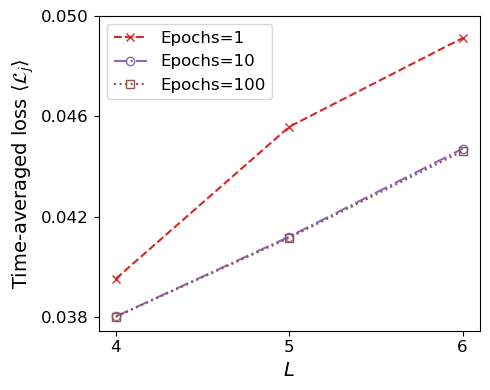

In [3]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot([4, 5, 6], [-data_l4e1.mean(), -data_l5e1.mean(), -data_l6e1.mean()], 'C3x--')
ax.plot([4, 5, 6], [-data_l4e10.mean(), -data_l5e10.mean(), -data_l6e10.mean()], 'C4o-.', mfc='none')
ax.plot([4, 5, 6], [-data_l4e100.mean(), -data_l5e100.mean(), -data_l6e100.mean()], 'C5s:', mfc='none')
ax.set_ylabel('Time-averaged loss ' + r'$\langle \mathcal{L}_j \rangle$', fontsize=14)
ax.set_xlabel(r'$L$', fontsize=14)
ax.set_xticks([4, 5, 6])
ax.set_yticks([0.038, 0.042, 0.046, 0.05])
ax.tick_params('both', labelsize=12)
ax.legend(['Epochs=1', 'Epochs=10', 'Epochs=100'], fontsize=12)

plt.tight_layout()
plt.savefig('avg_loss.svg')